-> Chargement des librairies et fonctions

// Ici je retest tout avec les 10 topic majoritaire par et le titre

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


false      210
true       210
mixture    210
other      182
Name: our rating, dtype: int64


C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


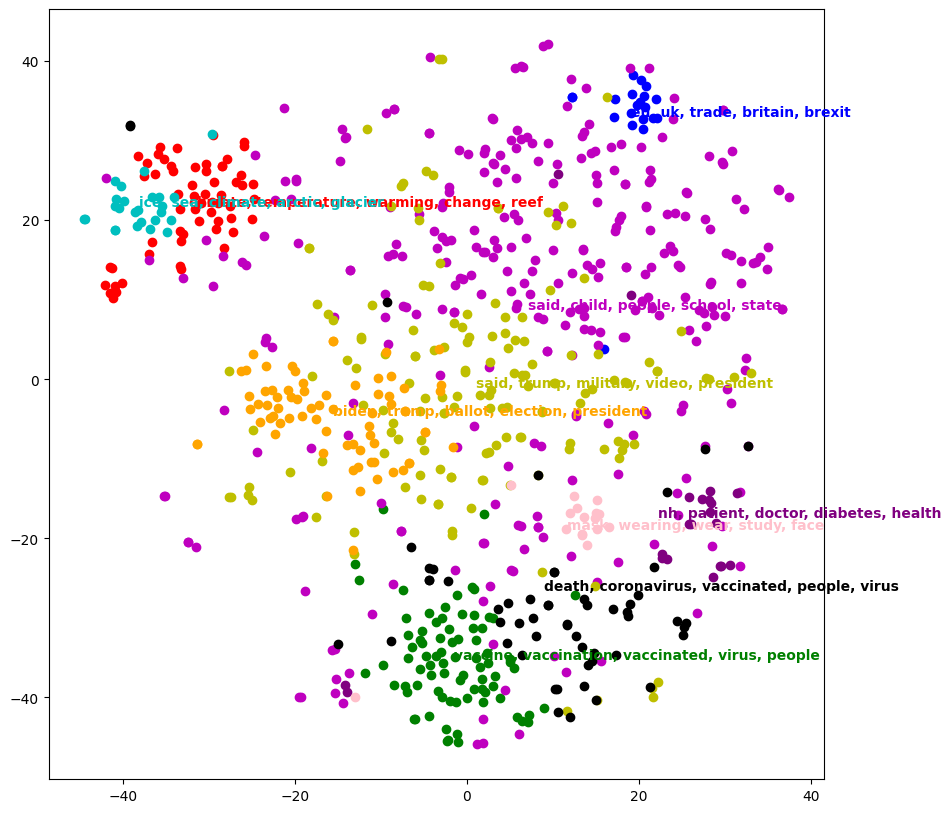

In [29]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# Load the Scikit-learn newsgroups dataset
from sklearn.datasets import fetch_20newsgroups

data_brute = pd.read_csv('./Data_equilibre/MyData_Sprint2.csv', sep=",")


data_brute = data_brute.drop_duplicates()
print(data_brute['our rating'].value_counts())

df = data_brute

newsgroups = fetch_20newsgroups(subset='all')

# Preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

data = [preprocess(text) for text in df.text]

# Create a document-term matrix using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data)

# Fit a k-means model to cluster the documents into 10 topics
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

# Get the top 10 words of each cluster
top_words = []
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(10):
    words = [terms[ind] for ind in order_centroids[i, :5]]
    top_words.append(words)

# Reduce the dimensionality of the document-term matrix using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X.toarray())
# Visualize the clusters in 2D space
fig, ax = plt.subplots(figsize=(10, 10))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']
for i in range(10):
    x = X_2d[kmeans.labels_ == i, 0]
    y = X_2d[kmeans.labels_ == i, 1]
    ax.scatter(x, y, c=colors[i])
    top_words_str = ', '.join(top_words[i])
    ax.annotate(top_words_str, (np.mean(x), np.mean(y)),
                color=colors[i], weight='bold')
plt.savefig('clusters.png')

In [30]:
# Predict the cluster labels for each document
labels = kmeans.predict(X)

topic_labels = [top_words[label] for label in labels]


data_brute['topic'] = topic_labels


selected_rows = data_brute[data_brute['topic'].isin([['election', 'ballot', 'vote', 'county', 'voter']])]



for i in top_words:
    print(i)
    print(data_brute[data_brute['topic'].isin([i])]['our rating'].value_counts())




# print(selected_rows['our rating'].value_counts())
#
#
#
# print(selected_rows['our rating'])

['eu', 'uk', 'trade', 'britain', 'brexit']
true       7
mixture    6
other      5
false      2
Name: our rating, dtype: int64
['vaccine', 'vaccination', 'vaccinated', 'virus', 'people']
other      36
true       24
false      14
mixture     7
Name: our rating, dtype: int64
['climate', 'temperature', 'warming', 'change', 'reef']
mixture    23
true       22
other       8
false       6
Name: our rating, dtype: int64
['ice', 'sea', 'climate', 'arctic', 'glacier']
true       12
mixture    10
other       2
false       1
Name: our rating, dtype: int64
['said', 'child', 'people', 'school', 'state']
mixture    110
true        84
false       61
other       57
Name: our rating, dtype: int64
['said', 'trump', 'military', 'video', 'president']
false      66
true       38
mixture    29
other      18
Name: our rating, dtype: int64
['death', 'coronavirus', 'vaccinated', 'people', 'virus']
other      26
false      11
true       10
mixture     8
Name: our rating, dtype: int64
['biden', 'trump', 'ballot',